# Predicting Strikes Based On Ball Position

The strike zone in baseball is effectively a decision boundary. Although it is classically defined as "from the armpits to the knees of a batter when in the batting position", it will naturally vary depending upon the batter and umpire.

In this project we will be using a Support Vector Machine (SVM) to predict strikes based on ball position.

### Imports

We'll be using the [pybaseball](https://github.com/jldbc/pybaseball) package for data and pandas and sklearn for analysis.
Matplotlib and numpy will be used for data visualization.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

## Helper Functions

We'll be using some helper functions to plot our data
and better visualize our SVM.

In [2]:
def make_meshgrid(ax, h=.02):
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def draw_boundary(ax, clf):
    xx, yy = make_meshgrid(ax)
    return plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)

## Data Investigation

Let's start by looking at the player data of `aaron_judge`.
We'll look at the overall column structure and the data type of each.


In [3]:
aaron_judge = pd.read_csv('aaron_judge.csv')
print(aaron_judge.columns)
print(aaron_judge.type)

Index(['Unnamed: 0', 'pitch_type', 'game_date', 'release_speed',
       'release_pos_x', 'release_pos_z', 'player_name', 'batter', 'pitcher',
       'events', 'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'pos2_person_id', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pos1_person_id',
       'pos2_person_id.1', 'pos3_person_id', 'pos4_person_id',
       'pos5_person_id', 'pos6_person_id', 'pos7_person_id', 'po

### Data Cleaning

In order to prepare the data for our SVM we will be eliminating null values
and changing the strike (`S`) and ball (`B`) values to numeric classifiers.

In [4]:
# for pitch type: changing strikes ('S') to 1 and balls ('B') to 0 with a passed dictionary
aaron_judge['type'] = aaron_judge['type'].map({'B':0, 'S':1})

# predicting whether pitch or strike based on location over the plate (x, z, type)
## eliminating nans, will lose some rows but even data will remain to serve the objective
aaron_judge = aaron_judge.dropna(subset = ['plate_x', 'plate_z', 'type'])

## Splitting The Data

Now that our data is analyzed and cleaned we can split it in to training and test sets.

In [5]:
# splitting the set to create a training and validation set
training_set, validation_set = train_test_split(aaron_judge, random_state=92)

## Building Our Model

Finally we can move on to creating our model.
We'll be using the default kernel `rbf` and training it based on ball position and type.


In [6]:
# creating an SVM to predict pitch outcome, radial basis function (rbf) is default
classifier = SVC()
classifier.fit(training_set[['plate_x', 'plate_z']], training_set['type'])

SVC()

Let's see how our model performed.

In [7]:
print(classifier.score(validation_set[['plate_x', 'plate_z']], validation_set['type']))

0.8521870286576169


85% is excellent for initial performance. With further tuning and testing it is likely we could achieve somewhat reliable performance that could then be generalized.

## Visualizing Our Machine

In order to better see the performance of our machine we can make a plot
of the data that was input (i.e. each throw's position) and whether that was counted as a strike or a ball. Furthermore, we can plot the decision boundary of our SVM.

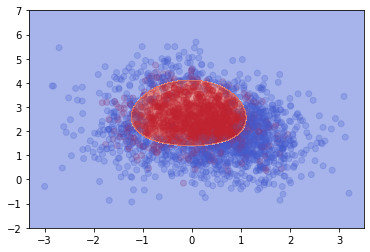

In [8]:
# setting up our plots
fig, ax = plt.subplots()

# creating a scatterplot to visualize the strikes/balls
plt.scatter(x = aaron_judge.plate_x,
            y = aaron_judge.plate_z,
            c = aaron_judge.type,
            cmap = plt.cm.coolwarm,
            alpha = 0.25)

# visualizing the boundary
ax.set_ylim(-2, 7)
draw_boundary(ax, classifier)

plt.show()

## Conclusion

In this project we defined the "real" strike zone for Aaron Judge, based on statistics from the 2017 season. We also graphed our SVM's decision boundary and overlayed it on the input data (balls, strikes, and ball position).

## Further Research

Although our initial performance was excellent, the model currently only performs well based on data from Aaron Judge.

To generalize the model we could pull more player data from the [pybaseball](https://github.com/jldbc/pybaseball) package. We could segment this data however we would like.
For example, we could create specific machines for each baseball team and identify areas where the opponent pitcher would statistically perform best.

We could also further its accuracy by more finely tuning the parameters and optimizing the machine.

#### Data Sources
Player data was provided by the [pybaseball](https://github.com/jldbc/pybaseball) package.
The svm_visualization functions were provided by [Codecademy.com](https://www.codecademy.com).
